In [1]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
%run Data_and_catalogs_proyect.ipynb

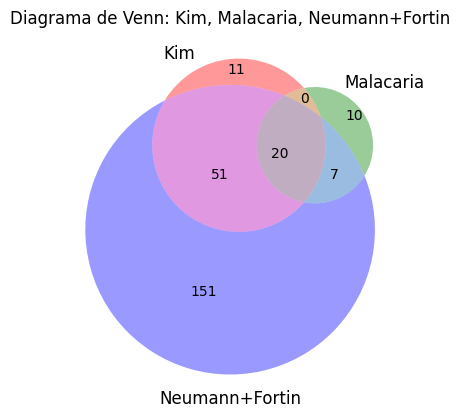

<Figure size 100x100 with 0 Axes>

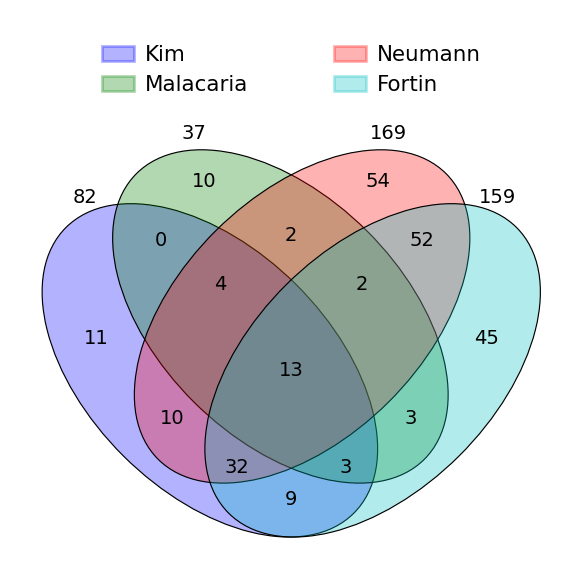

In [31]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

kim = set(nombres_kim_t) | set(nombres_kim_p)
malacaria = set(nombres_malacaria_transient) | set(nombres_malacaria_persistent)
neumann = set(nombres_neuman)
fortin = set(nombres_fortin)

neumann_fortin = neumann | fortin

venn_diagram = venn3(
    subsets=(
        len(kim - malacaria - neumann_fortin),
        len(malacaria - kim - neumann_fortin),
        len(kim & malacaria - neumann_fortin),
        len(neumann_fortin - kim - malacaria),
        len(kim & neumann_fortin - malacaria),
        len(malacaria & neumann_fortin - kim),
        len(kim & malacaria & neumann_fortin)
    ),
    set_labels=("Kim", "Malacaria", "Neumann+Fortin")
)

plt.title("Diagrama de Venn: Kim, Malacaria, Neumann+Fortin")
plt.figure(figsize=(1, 1))
plt.show()


from venny4py.venny4py import *

sets = {
    'Kim': set(nombres_kim_t) | set(nombres_kim_p),
    'Malacaria': set(nombres_malacaria_transient) | set(nombres_malacaria_persistent),
    'Neumann': set(nombres_neuman),
    'Fortin': set(nombres_fortin)
}

venny4py(sets=sets)

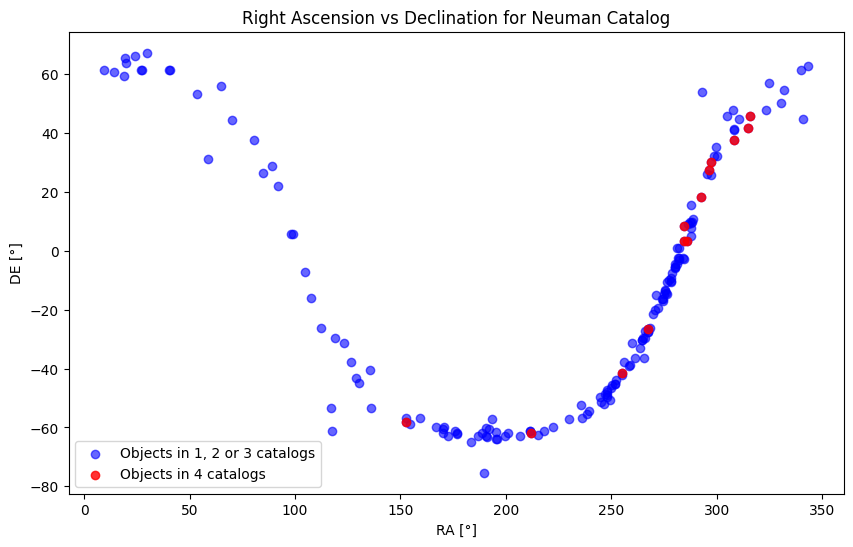

In [25]:
ra_deg = cat_neuman["RAdeg"]
de_deg = cat_neuman["DEdeg"]

coordenadas_comunes = cat_neuman[cat_neuman["Name"].isin(elementos_en_cuatro_catalogos)][["RAdeg", "DEdeg"]]
plt.figure(figsize=(10, 6))

plt.scatter(ra_deg, de_deg, marker='o', color='blue', alpha=0.6, label='Objects in 1, 2 or 3 catalogs')
plt.scatter(coordenadas_comunes["RAdeg"], coordenadas_comunes["DEdeg"], marker='o', color='red', alpha=0.8, label='Objects in 4 catalogs')

plt.title("Right Ascension vs Declination for Neuman Catalog")
plt.xlabel("RA [°]")
plt.ylabel("DE [°]")
plt.legend()
plt.show()

### Now we plot the same, but mor especific.

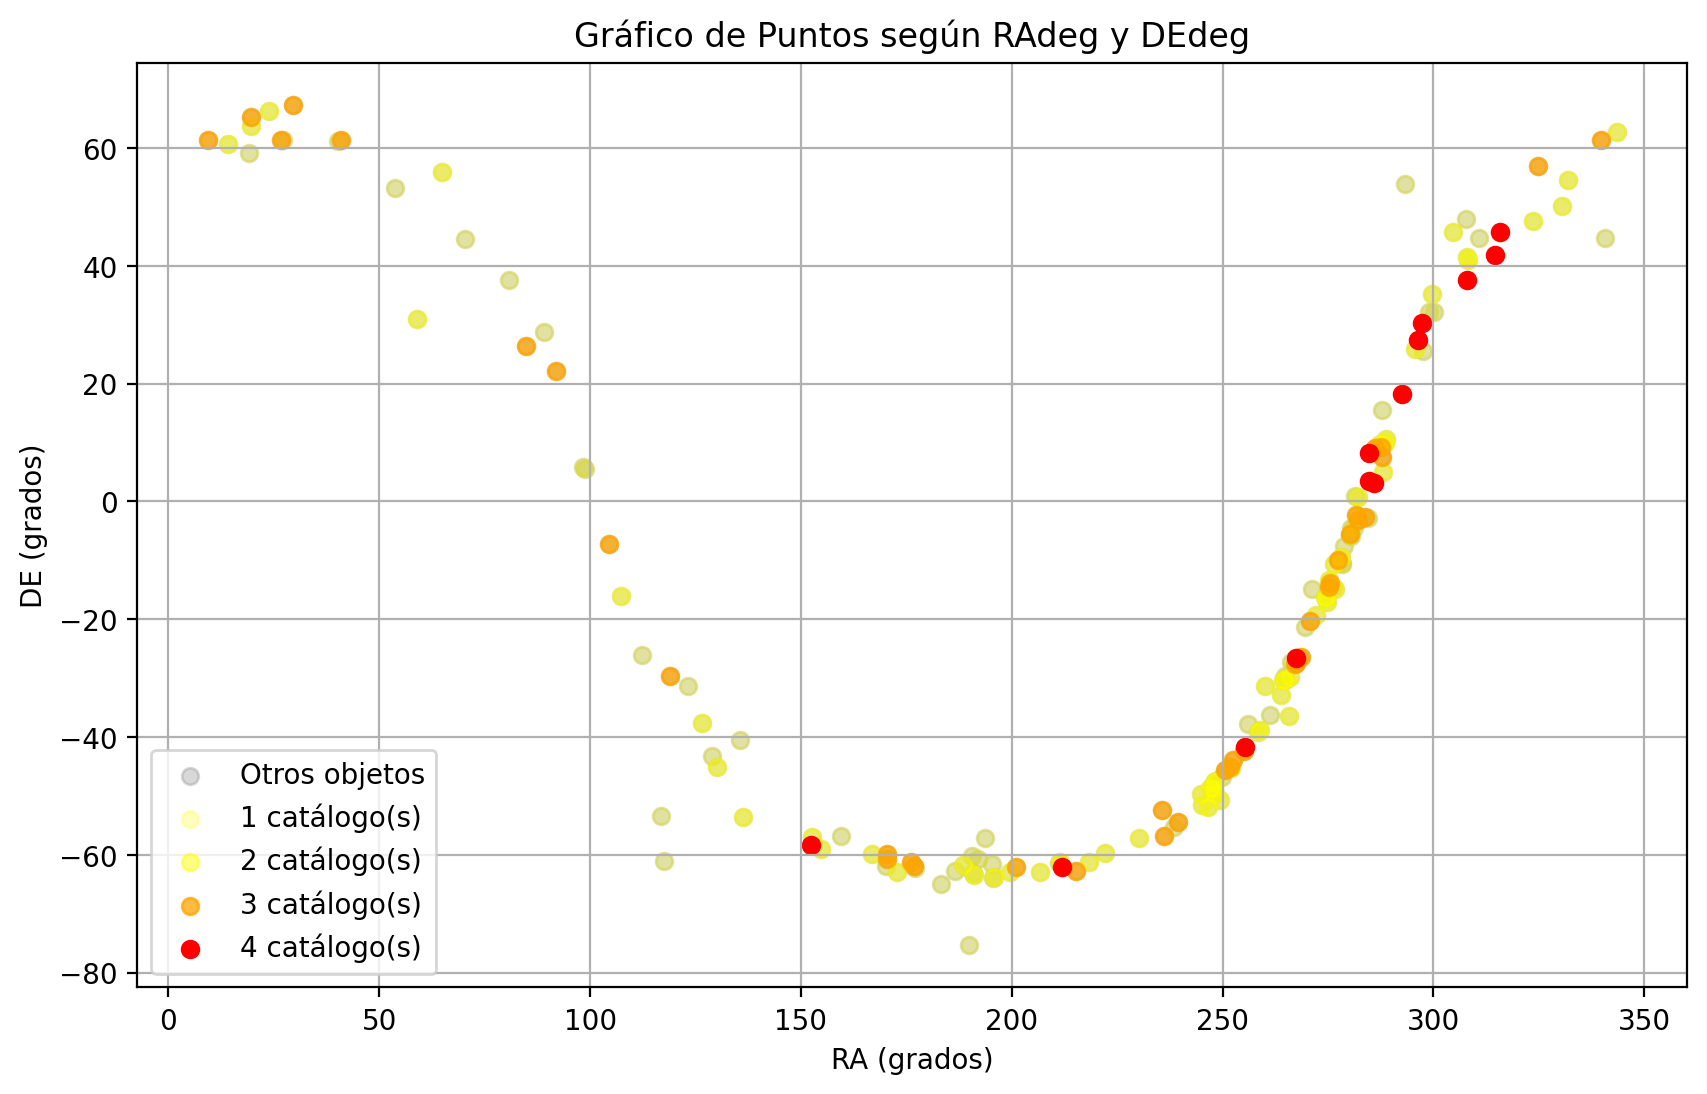

In [32]:
grupos_coordenadas = {}
for i in range(1, 5):
    elementos = conteo_nombres[conteo_nombres == i].index.tolist()
    grupos_coordenadas[i] = cat_neuman[cat_neuman["Name"].isin(elementos)][["RAdeg", "DEdeg"]]

plt.figure(figsize=(10, 6))
colores = {1: ('yellow', 0.25), 2: ('yellow', 0.5), 3: ('orange', 0.75), 4: ('red', 1)}

plt.scatter(ra_deg, de_deg, marker='o', color='gray', alpha=0.3, label='Otros objetos')

for i, (color, alpha) in colores.items():
    coords = grupos_coordenadas.get(i, pd.DataFrame(columns=["RAdeg", "DEdeg"]))
    if not coords.empty:
        plt.scatter(coords["RAdeg"], coords["DEdeg"], marker='o', color=color, alpha=alpha, label=f'{i} catálogo(s)')

plt.title("Gráfico de Puntos según RAdeg y DEdeg")
plt.xlabel("RA (grados)")
plt.ylabel("DE (grados)")
plt.grid()
plt.legend()
plt.show()

### Now The same objects but for the Galactic Latitude and Longitude. As we see, almost all objects are plus minus five degrees above/below the galactic plane. 

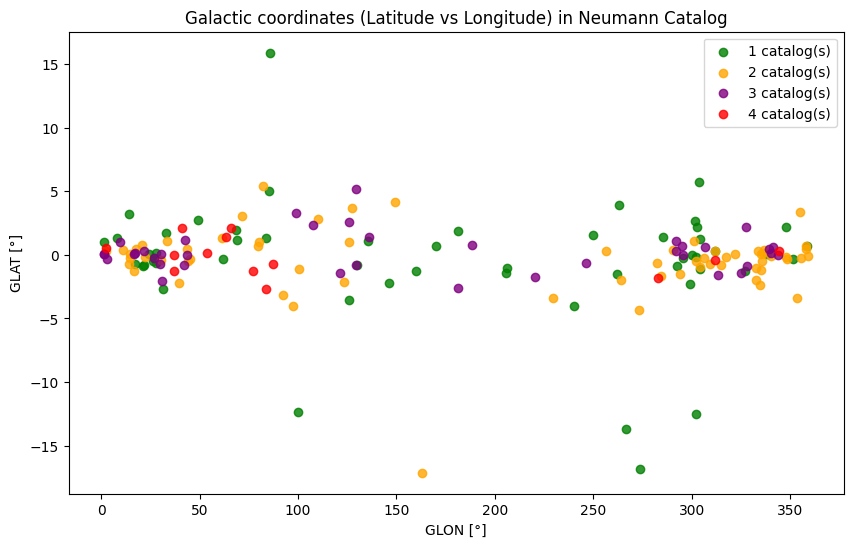

In [6]:
grupos_coordenadas = {}
for i in range(1, 5):
    elementos = conteo_nombres[conteo_nombres == i].index.tolist()
    grupos_coordenadas[i] = cat_neuman[cat_neuman["Name"].isin(elementos)][["GLON", "GLAT"]]

plt.figure(figsize=(10, 6))
colores = {1: 'green', 2: 'orange', 3: 'purple', 4: 'red'}

for i, coords in grupos_coordenadas.items():
    plt.scatter(coords["GLON"], coords["GLAT"], marker='o', color=colores[i], alpha=0.8, label=f'{i} catalog(s)')

plt.title("Galactic coordinates (Latitude vs Longitude) in Neumann Catalog")
plt.xlabel("GLON [°]")
plt.ylabel("GLAT [°]")
plt.legend()
plt.show()

### We briefly remember the definition of the Galactic longitude (l) and the Galactic latitude (b).

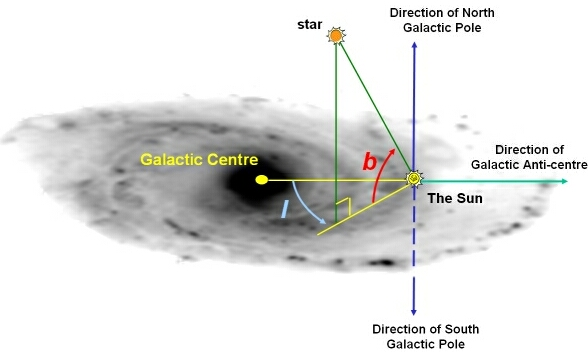

In [7]:
display(Image(filename='coordenadas_galacticas.png'))

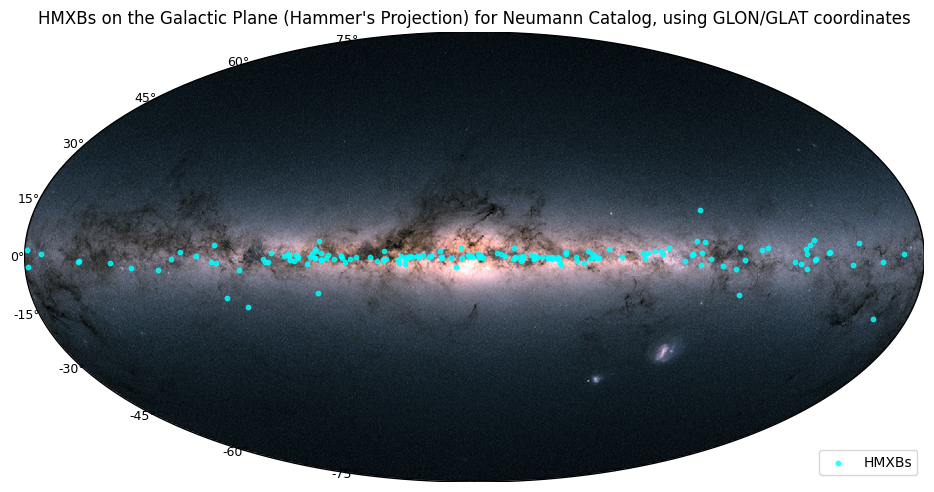

In [27]:
nombre_excel = "HMXB_catalogs.xlsx"
cat_neuman = pd.read_excel(nombre_excel, sheet_name="HMXB_cat_Neumann")
glon, glat = cat_neuman["GLON"].values, cat_neuman["GLAT"].values

fig, ax = plt.subplots(figsize=(10, 7))

m = Basemap(projection='hammer', lon_0=0, ax=ax)

img = mpimg.imread('galaxia.jpg')
m.imshow(img, origin='upper', alpha=1)

x, y = m(glon, glat)
m.scatter(x, y, c='cyan', s=10, alpha=0.8, label='HMXBs')

for lat in np.arange(-75, 76, 15):
    x_text, y_text = m(-180, lat)
    plt.text(x_text, y_text, f'{lat}°', ha='right', va='center', fontsize=9, color='black')

plt.subplots_adjust(left=0.05, right=0.95, top=0.8, bottom=0.1)

plt.title("HMXBs on the Galactic Plane (Hammer's Projection) for Neumann Catalog, using GLON/GLAT coordinates")
plt.legend(loc='lower right')

plt.show()


Now, I show the distribution in galactic coordinates for Neumann Catalog, also with error bars in diagonals, and the distance to the galactic plane in the colorbar.

Also, the distance $D_{plane}$ to the galactic plane, given the distance to the sun $d_{sun}$ and the latitude $b$:

$$D_{plane} = d_{sun}\cdot sin(b)$$

The $X$ and $Y$ distances in parsecs, are the following (given the galactic longitude $l$):

$$ X = d_{sun}\cdot cos(b)\cdot cos(l)$$
$$ Y = d_{sun}\cdot cos(b)\cdot sin(l)$$

The error bars were calculated taking into acount the low and high distances to the sun. 

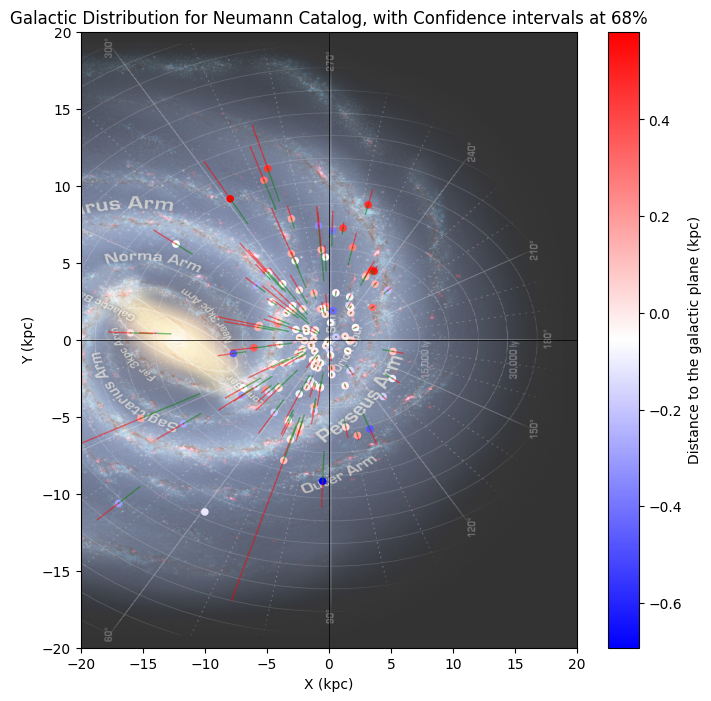

In [9]:
df = pd.read_excel('HMXB_catalogs.xlsx', sheet_name='HMXB_cat_Neumann')
glon = np.deg2rad(df['GLON'].values)
glat = np.deg2rad(df['GLAT'].values)
mean_dist = df['Mean_Dist'].values * u.pc
low_dist = df['Low_Dist'].values * u.pc
high_dist = df['High_Dist'].values * u.pc

mean_dist = mean_dist.to(u.kpc).value
low_dist = low_dist.to(u.kpc).value
high_dist = high_dist.to(u.kpc).value

error_sup = (high_dist - mean_dist) / 2
error_inf = (mean_dist - low_dist) / 2

error_sup = np.abs(error_sup)
error_inf = np.abs(error_inf)

x = mean_dist * np.cos(glat) * np.cos(glon)
y = mean_dist * np.cos(glat) * np.sin(glon)
x = -x
dist_plano = mean_dist * np.sin(glat)

x_err_sup = error_sup * (x / np.sqrt(x**2 + y**2))
y_err_sup = error_sup * (y / np.sqrt(x**2 + y**2))
x_err_inf = error_inf * (x / np.sqrt(x**2 + y**2))
y_err_inf = error_inf * (y / np.sqrt(x**2 + y**2))

plt.figure(figsize=(8, 8))
img = plt.imread('galaxia_coord.png')
plt.imshow(img, extent=[-20, 20, -20, 20], aspect='auto', zorder=0, alpha=0.8)

sc = plt.scatter(x, y, c=dist_plano, cmap="bwr", s=30, alpha=1, edgecolor='none', zorder=1)

cbar = plt.colorbar(sc)
cbar.set_label('Distance to the galactic plane (kpc)')

for i in range(len(x)):
    plt.plot([x[i], x[i] + x_err_sup[i]], 
             [y[i], y[i] + y_err_sup[i]], 
             color='red', alpha=0.5, linewidth=1.)
    plt.plot([x[i], x[i] - x_err_inf[i]], 
             [y[i], y[i] - y_err_inf[i]], 
             color='green', alpha=0.5, linewidth=1.)

plt.title('Galactic Distribution for Neumann Catalog, with Confidence intervals at 68%')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.grid(False)
plt.show()


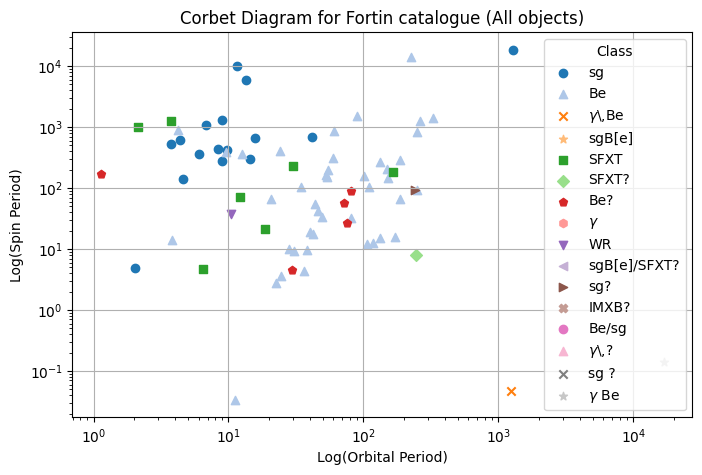

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

period = v2023_09_Fortin["Period"].values
spin_period = v2023_09_Fortin["Spin_period"].values
clases = v2023_09_Fortin["Class"].values

unique_classes = v2023_09_Fortin["Class"].dropna().unique()

colors = plt.colormaps['tab20'](range(len(unique_classes)))

markers = ['o', '^', 'x', '*', 's', 'D', 'p', 'h', 'v', '<', '>', 'X']

estilos_de_clase = {
    cls: {'color': colors[i % len(colors)], 'marker': markers[i % len(markers)]}
    for i, cls in enumerate(unique_classes)
}

fig, ax = plt.subplots(figsize=(8, 5))

for cls in estilos_de_clase.keys():
    mask = clases == cls
    ax.scatter(period[mask], spin_period[mask], 
               color=estilos_de_clase[cls]['color'], 
               marker=estilos_de_clase[cls]['marker'], 
               label=cls if len(period[mask]) > 0 else "")

ax.set_title("Corbet Diagram for Fortin catalogue (All objects)")
ax.set_xlabel("Log(Orbital Period)")
ax.set_ylabel("Log(Spin Period)")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()

ax.legend(title="Class", loc='upper right')
plt.show()


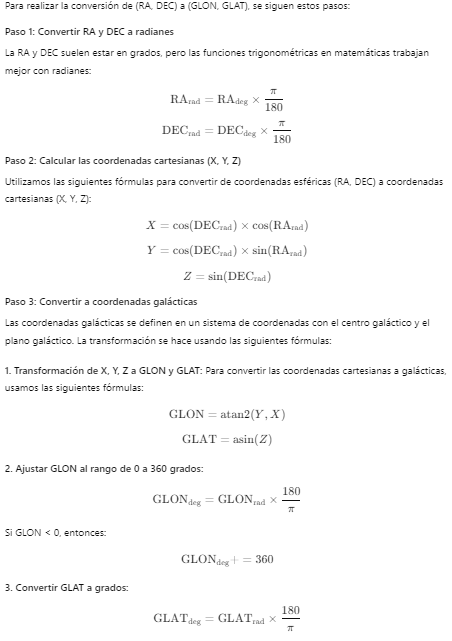

In [11]:
display(Image(filename='conversion_coordenadas.png'))

One hour is equivalent to $15°$, 1 minute to $\frac{15°}{60}$ and 1 second equal to $\frac{15°}{3600}$. In both kim catalogs their objects have their equatorial coordinates as:
$$RA: [hours, minutes, seconds]$$
$$DEC: [degrees, arcmin, arcsec]$$
And therefore we have to convert them to degrees [°]
Here we want to use kim catalog to corroborate the distribution of Neumann Catalog in RA/DEC and also LAT/LONG graphics.

In [12]:
kim_persistent = columna_kim_p.values
kim_transient = columna_kim_t.values

def convertir_coordenadas(elemento):
    partes = elemento.split()
    
    ra_hms = f"{partes[3]}h{partes[4]}m{partes[5]}s" 
    dec_dms = f"{partes[6]}d{partes[7]}m{partes[8]}s"
    spin_p = partes[9]
    ra = Angle(ra_hms).degree
    dec = Angle(dec_dms).degree
    return ra, dec, spin_p

ra_persistent, dec_persistent, spin_p_pers = zip(*[convertir_coordenadas(el) for el in kim_persistent])

ra_transient, dec_transient, spin_p_trans = zip(*[convertir_coordenadas(el) for el in kim_transient])

Now we convert the equatorial coordinates to galactic coordinates.

In [13]:
def convert_to_galactic(ra, dec):
    coord = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame='icrs')
    lon = coord.galactic.l.degree
    lat = coord.galactic.b.degree
    return lon, lat

lon_persistent, lat_persistent = convert_to_galactic(ra_persistent, dec_persistent)
lon_transient, lat_transient = convert_to_galactic(ra_transient, dec_transient)

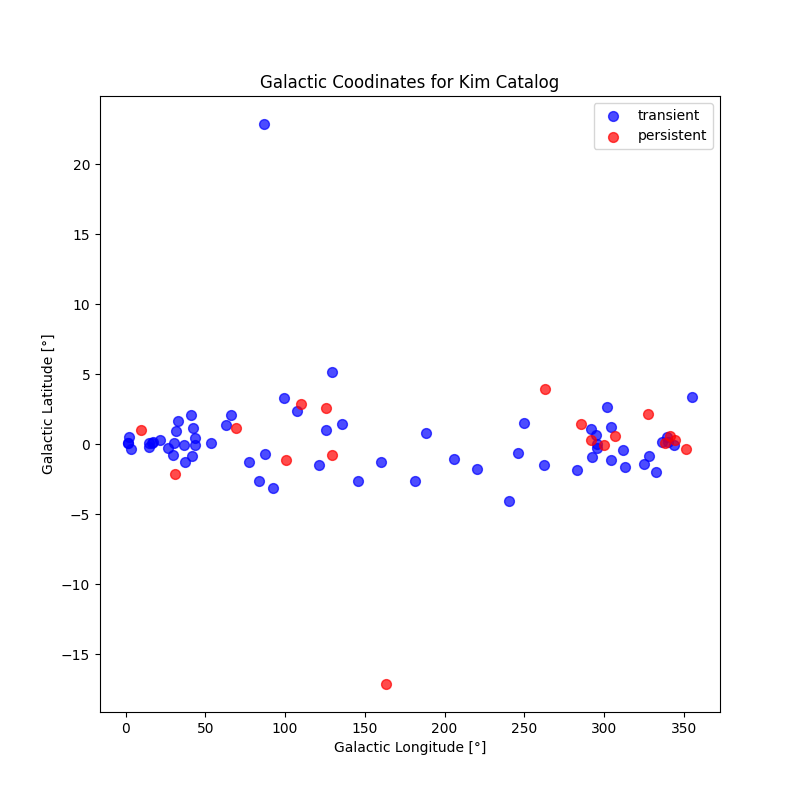

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(lon_transient, lat_transient, c='blue', marker='o', s=50, alpha=0.7, label="transient")
plt.scatter(lon_persistent, lat_persistent, c='red', marker='o', s=50, alpha=0.7, label="persistent")
plt.title('Galactic Coodinates for Kim Catalog')
plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.legend(loc='best')
plt.show()


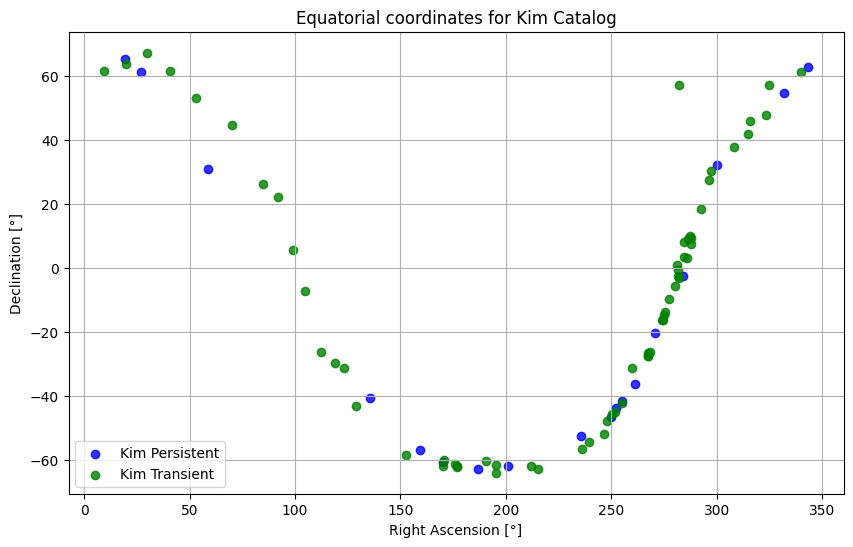

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(ra_persistent, dec_persistent, marker='o', color='blue', alpha=0.8, label='Kim Persistent')
plt.scatter(ra_transient, dec_transient, marker='o', color='green', alpha=0.8, label='Kim Transient')
plt.title("Equatorial coordinates for Kim Catalog")
plt.xlabel("Right Ascension [°]")
plt.ylabel("Declination [°]")
plt.grid()
plt.legend()
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Max_Soft_Flux = cat_neuman['Max_Soft_Flux']
Min_Soft_Flux = cat_neuman['Min_Soft_Flux']

df['Geometric_Mean'] = np.sqrt(df['Max_Soft_Flux'] * df['Min_Soft_Flux'])

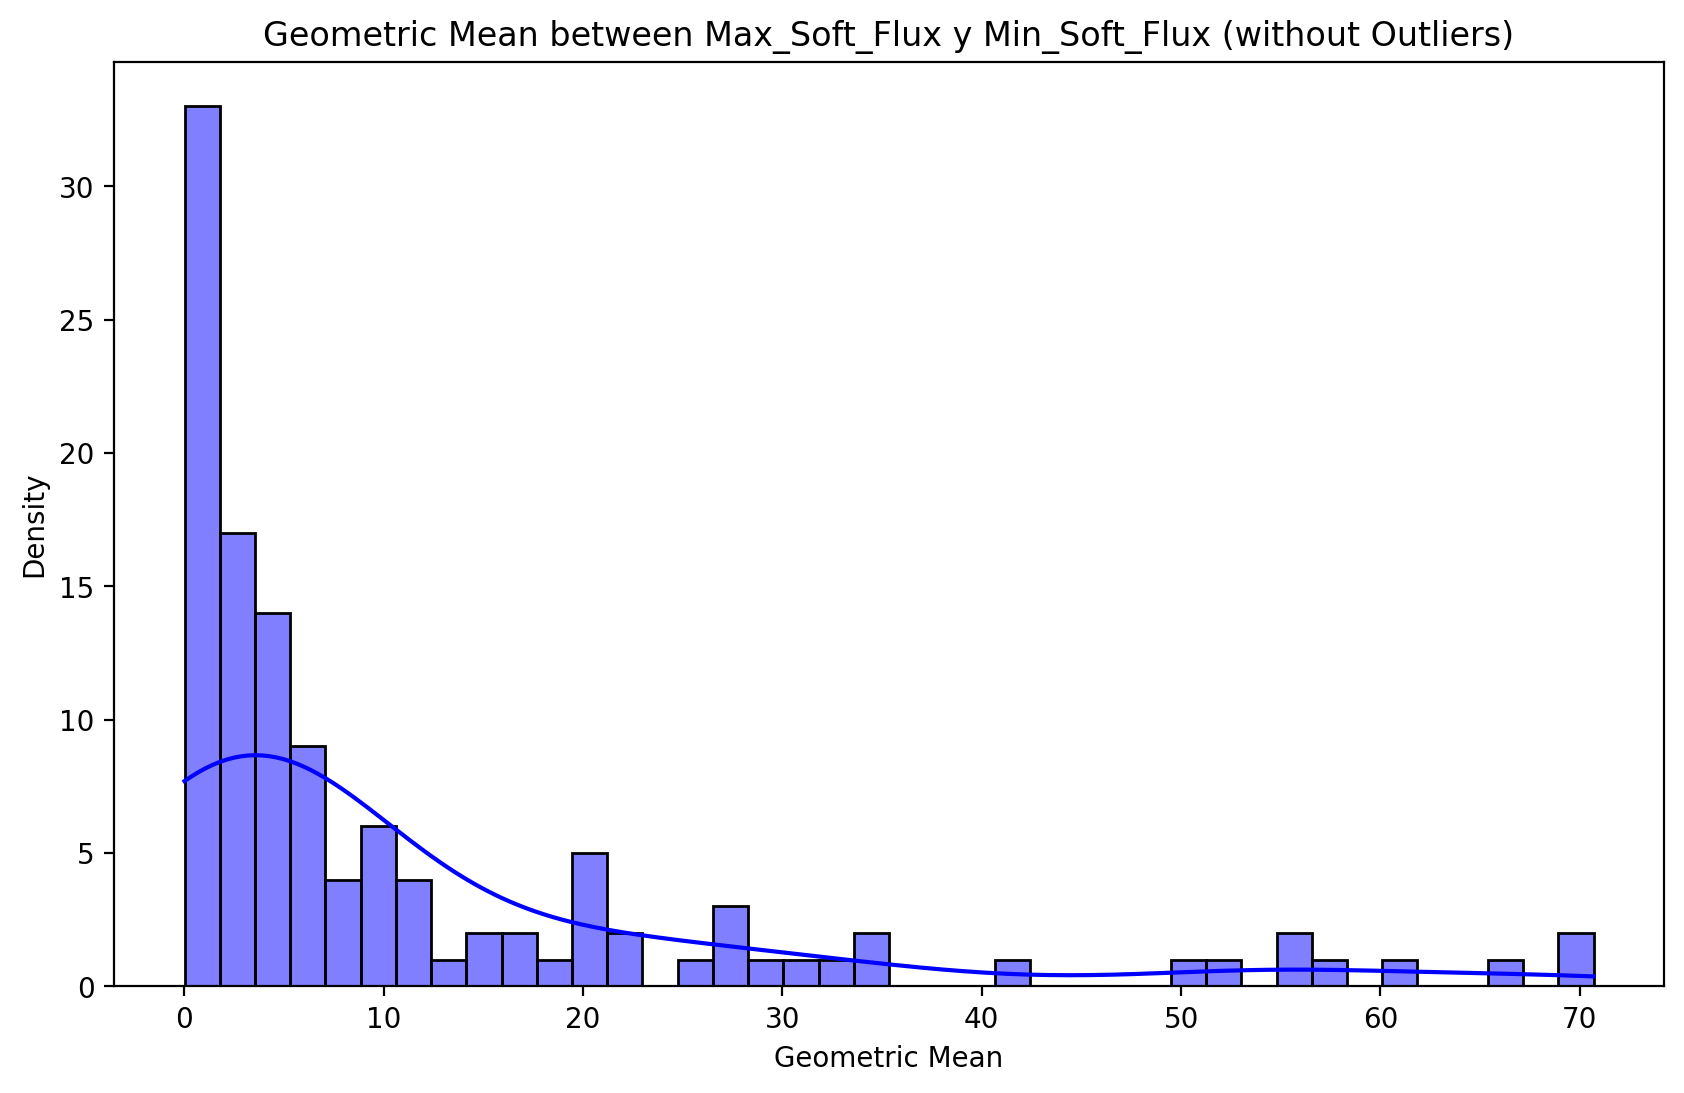

In [33]:
Q1 = df['Geometric_Mean'].quantile(0.25)
Q3 = df['Geometric_Mean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['Geometric_Mean'] >= lower_bound) & (df['Geometric_Mean'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Geometric_Mean'], kde=True, bins=40, color='blue')

plt.title('Geometric Mean between Max_Soft_Flux y Min_Soft_Flux (without Outliers)')
plt.xlabel('Geometric Mean')
plt.ylabel('Density')

plt.show()


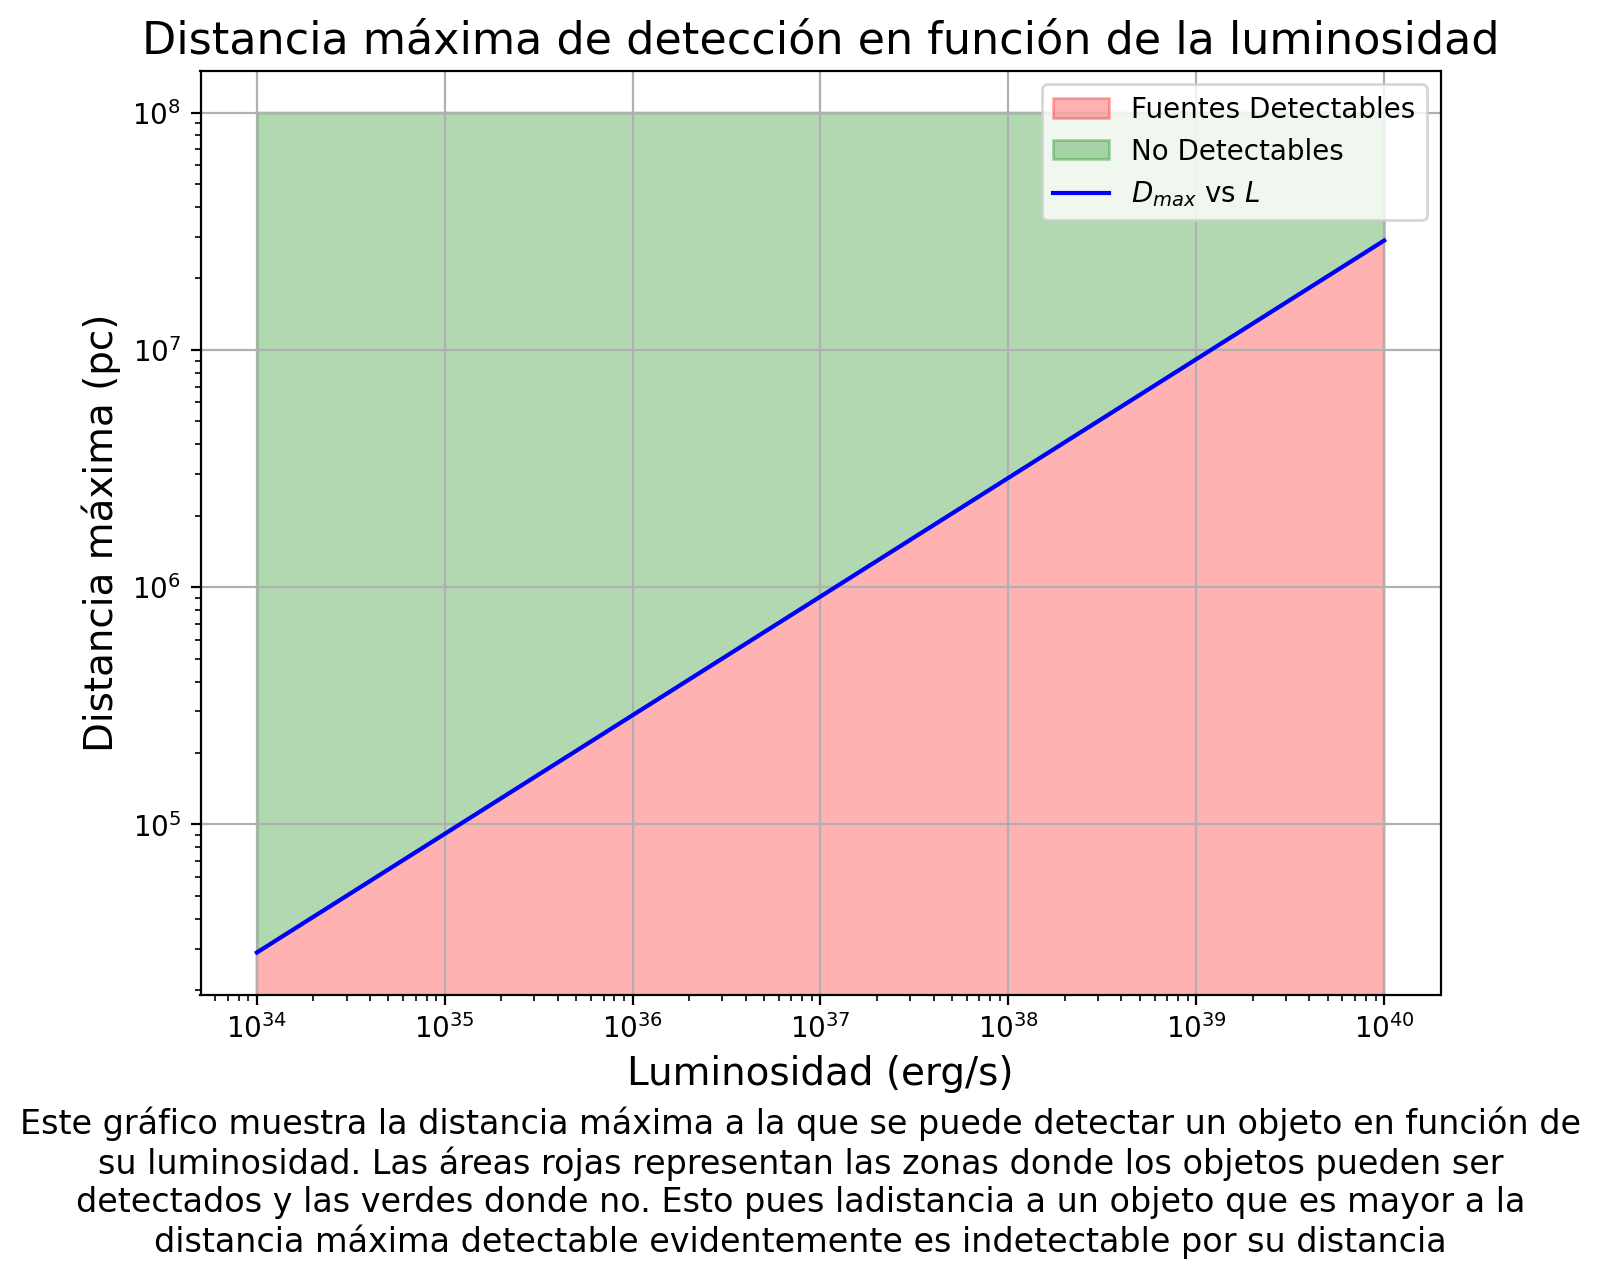

In [35]:
import numpy as np
import matplotlib.pyplot as plt

F_min = 1e-13
constant = 7.96e11

def max_distance(L):
    return np.sqrt(constant * L)

luminosities = np.logspace(34, 40, num=100) 
distances = max_distance(luminosities)
distances_pc = distances / 3.09e18
max_distance_limit = 1e8

plt.figure(figsize=(8, 6))

plt.fill_between(luminosities, distances_pc, 0, where=(luminosities <= luminosities), color='red', alpha=0.3, label='Fuentes Detectables')


plt.fill_between(luminosities, distances_pc, max_distance_limit, color='green', alpha=0.3, label='No Detectables')


plt.plot(luminosities, distances_pc, label=r'$D_{max}$ vs $L$', color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Luminosidad (erg/s)', fontsize=14)
plt.ylabel('Distancia máxima (pc)', fontsize=14)
plt.title('Distancia máxima de detección en función de la luminosidad', fontsize=16)

plt.figtext(0.5, -0.1, 
            'Este gráfico muestra la distancia máxima a la que se puede detectar un objeto en función de su luminosidad. '
            'Las áreas rojas representan las zonas donde los objetos pueden ser detectados y las verdes donde no. Esto pues la' 
            'distancia a un objeto que es mayor a la distancia máxima detectable evidentemente es indetectable por su distancia',
            wrap=True, horizontalalignment='center', fontsize=12)

plt.grid(True)
plt.legend()
plt.show()
